<a href="https://colab.research.google.com/github/SuhasTantri/Cardiovascular-Risk-Prediction-Classification/blob/main/Raghavendra_Suhas_Team_Cardiovascular_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [158]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import math
!pip install imblearn
import imblearn
from imblearn.over_sampling import SMOTE

In [159]:
 #Reading the dataset
df=pd.read_csv('/Users/amoghpai/Downloads/Copy of data_cardiovascular_risk.csv')

In [160]:
# A look at the dataset
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [161]:
df['education'].unique()

array([ 2.,  4.,  1.,  3., nan])

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [163]:
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [164]:
# Finding corelation among all the variables
df.corr()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,1.000000,0.016759,-0.030573,-0.017249,0.007080,-0.038873,0.013236,0.003690,-0.019889,0.019676,0.000832,0.039849,0.024684,0.015517,0.009866
age,0.016759,1.000000,-0.172559,-0.192335,0.124376,0.059038,0.308826,0.107875,0.274028,0.404845,0.221896,0.138176,-0.002596,0.116135,0.224927
education,-0.030573,-0.172559,1.000000,0.011126,-0.019920,-0.034194,-0.084817,-0.052013,-0.020781,-0.137195,-0.060801,-0.133313,-0.046980,-0.038732,-0.052751
cigsPerDay,-0.017249,-0.192335,0.011126,1.000000,-0.037080,-0.042057,-0.079312,-0.049016,-0.024703,-0.100834,-0.068785,-0.100996,0.066759,-0.068797,0.066778
BPMeds,0.007080,0.124376,-0.019920,-0.037080,1.000000,0.119402,0.259548,0.071316,0.083299,0.263729,0.201217,0.087932,0.018107,0.064490,0.088020
prevalentStroke,-0.038873,0.059038,-0.034194,-0.042057,0.119402,1.000000,0.071652,0.010115,-0.010832,0.057568,0.047235,0.018602,-0.019184,0.023607,0.068627
prevalentHyp,0.013236,0.308826,-0.084817,-0.079312,0.259548,0.071652,1.000000,0.082565,0.159680,0.699285,0.612897,0.300464,0.150815,0.086658,0.166544
diabetes,0.003690,0.107875,-0.052013,-0.049016,0.071316,0.010115,0.082565,1.000000,0.059080,0.124011,0.061165,0.089112,0.039742,0.620211,0.103681
totChol,-0.019889,0.274028,-0.020781,-0.024703,0.083299,-0.010832,0.159680,0.059080,1.000000,0.199159,0.154974,0.114305,0.087458,0.062723,0.094306
sysBP,0.019676,0.404845,-0.137195,-0.100834,0.263729,0.057568,0.699285,0.124011,0.199159,1.000000,0.781908,0.333864,0.178262,0.143090,0.212703


In [165]:
# Checking for null values in the dataset
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [166]:
df['glucose'].unique()

array([ 80.,  75.,  94.,  77.,  65.,  79.,  63.,  nan,  87.,  67.,  85.,
       132.,  76., 100.,  70.,  60.,  73.,  81.,  68.,  66.,  78.,  96.,
        72.,  61.,  69., 103.,  92., 105.,  93.,  89.,  64.,  83., 170.,
        57.,  58.,  86.,  99., 107.,  55.,  90., 177.,  71., 118.,  59.,
        74.,  84.,  82.,  95., 120., 173.,  91., 102., 163.,  88.,  62.,
       205.,  97., 115.,  98., 268., 104., 137., 106., 348., 110., 122.,
       108., 255., 140., 124., 244., 294., 112., 113., 254., 116.,  52.,
        50., 114., 127.,  56., 135.,  45., 206.,  53., 101., 117., 126.,
       131., 394., 123., 270., 320., 129., 142.,  54., 235.,  40., 150.,
       136., 191.,  44., 119., 109., 121.,  43., 256., 145.,  47., 297.,
       166., 172.,  48., 111., 215., 216., 368., 155., 148., 147., 223.,
       225., 332., 210., 186., 386., 248., 193., 125., 167., 183., 260.,
       274.])

In [167]:
# Store the variables which have null values in a list
null_col=['cigsPerDay','BPMeds','totChol','BMI','glucose']


#**Handling Null Values**

In [168]:
# Replacing null values with mean
for x in null_col:
  df[x].fillna(df[x].mean(),inplace=True)

In [169]:
# Dropping the single row which has null value 
df.dropna(subset=['heartRate'],inplace=True)

In [170]:
df.isnull().sum()

id                  0
age                 0
education          87
sex                 0
is_smoking          0
cigsPerDay          0
BPMeds              0
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                 0
heartRate           0
glucose             0
TenYearCHD          0
dtype: int64

In [171]:
# Dropping the variables which are insignificant
df.drop(labels=['id','education'],inplace=True,axis=1)


In [172]:
df.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1
1,36,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0
2,46,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0
3,50,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1
4,64,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0


In [173]:
# Creating the list of variables for which distribution plot needs to be plotted
dist_col=['totChol','sysBP','diaBP','BMI','heartRate','glucose']

/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/amog

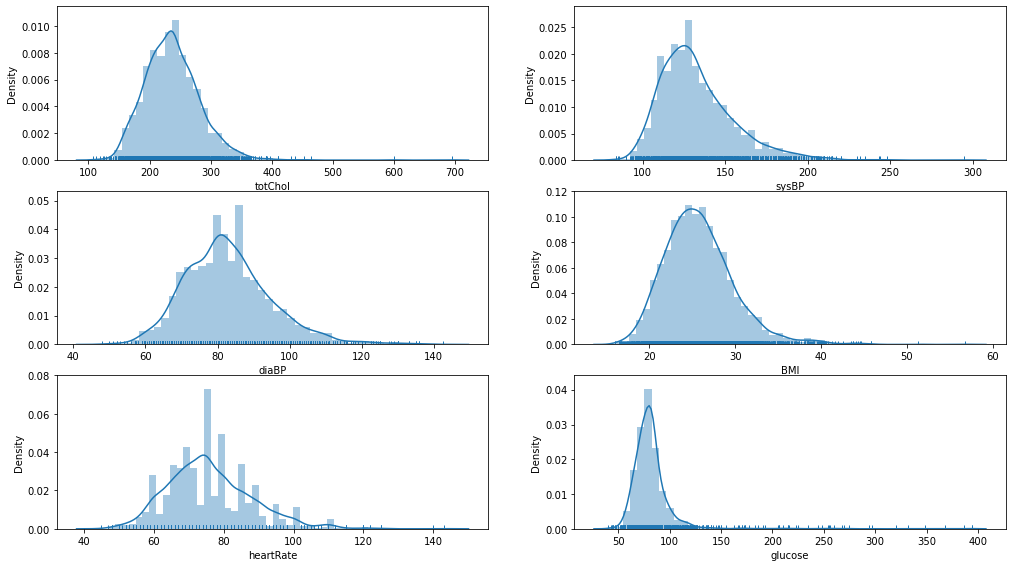

In [174]:
# Let's look at the distribution of the variables using distplot
plt.figure(figsize=(17,13))
for i in range(len(dist_col)):
  plt.subplot(4,2,i+1)
  sns.distplot(df[dist_col[i]],hist=True,rug=True)

/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/amog

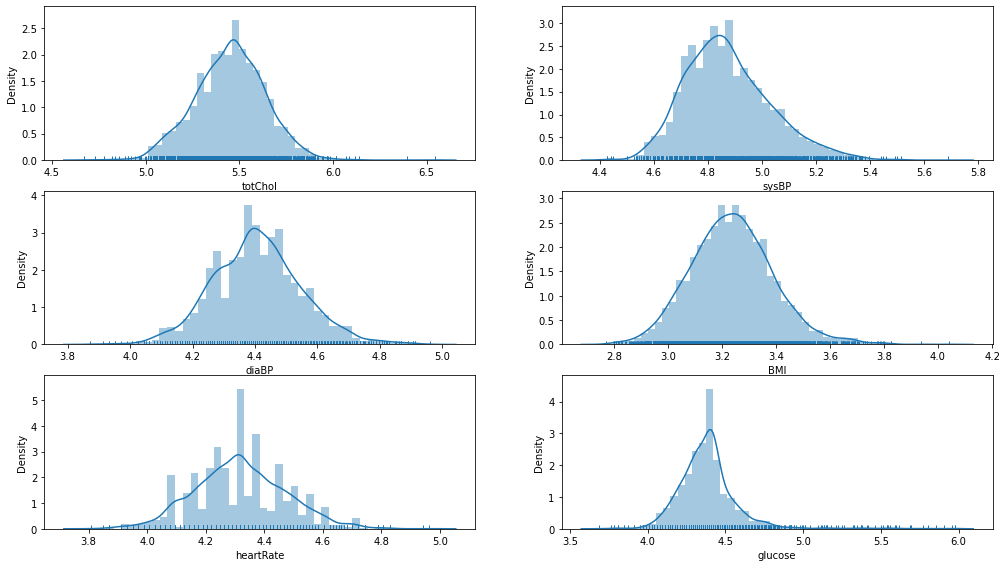

In [175]:
# Normalising the data using log transformation
plt.figure(figsize=(17,13))
for i in range(len(dist_col)):
  plt.subplot(4,2,i+1)
  sns.distplot(np.log(df[dist_col[i]]),hist=True,rug=True)

In [176]:
df.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1
1,36,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0
2,46,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0
3,50,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1
4,64,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0


Text(0.5, 1.0, 'Count of people who have risk of CHD based on gender')

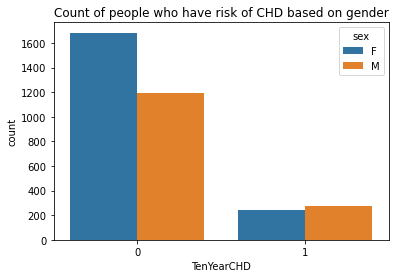

In [177]:
# Count plot
sns.countplot(x='TenYearCHD',data=df,hue='sex')
plt.title('Count of people who have risk of CHD based on gender')

**More male patients have risk of future coronary heart disease than female patients**

In [178]:
df0=df.iloc[:,1:3]
df0['smoking']=df0['is_smoking'].apply (lambda x:0 if x=='NO' else 1 )
df_smoke=df0.groupby(['sex','is_smoking']).count()
df_smoke=df_smoke.reset_index()
df_smoke

,sex,is_smoking,smoking
0,F,NO,1147
1,F,YES,776
2,M,NO,556
3,M,YES,910


Text(0.5, 1.0, 'Plot of people who smoke based on gender')

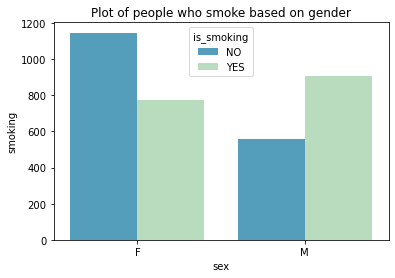

In [179]:
# Plot to see people who smoke more based on gender
sns.barplot(x="sex",
           y="smoking",
           hue="is_smoking",
           data=df_smoke,palette='GnBu_r')
plt.title('Plot of people who smoke based on gender')

**Male patients smoke more compared to female patients in the given dataset**

Text(0.5, 1.0, 'Plot of people who have Risk of heart rate based on age')

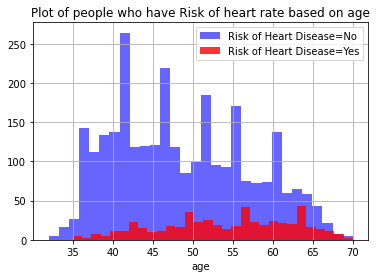

In [180]:
#  Histogram Plot
df[df['TenYearCHD']==0]['age'].hist(bins=30,color='blue',label='Risk of Heart Disease=No',alpha=0.6)
df[df['TenYearCHD']==1]['age'].hist(bins=30,color='red',label='Risk of Heart Disease=Yes',alpha=0.8)
plt.legend()
plt.xlabel('age')
plt.title('Plot of people who have Risk of heart rate based on age')


**Most of the patients who have risk of future coronary heart disease are aged above 45**

Text(0.5, 1.0, 'Plot of BP against Cholestrol')

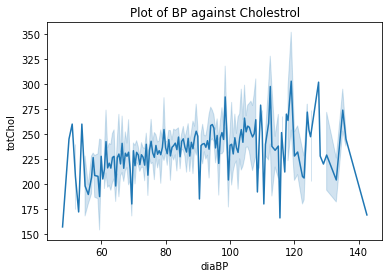

In [181]:
sns.lineplot(data=df,x=df['diaBP'],y=df['totChol'])
plt.title('Plot of BP against Cholestrol')

<AxesSubplot:xlabel='age', ylabel='heartRate'>

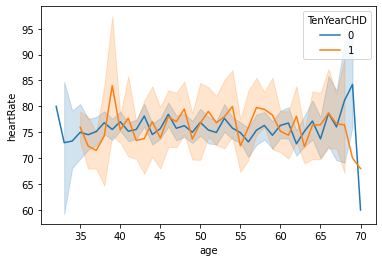

In [182]:
sns.lineplot(data=df,x=df['age'],y=df['heartRate'],hue='TenYearCHD')

# ***Checking for outliers using box plot***

<AxesSubplot:>

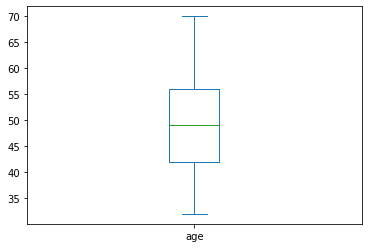

In [183]:

df.age.plot.box()

<AxesSubplot:>

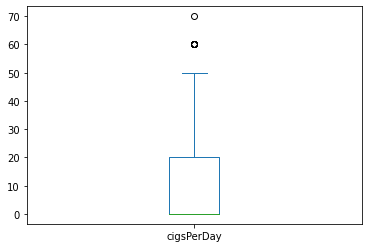

In [184]:
df.cigsPerDay.plot.box()

<AxesSubplot:>

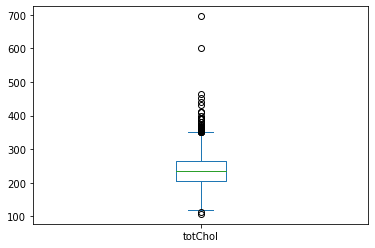

In [185]:
df.totChol.plot.box()

<AxesSubplot:>

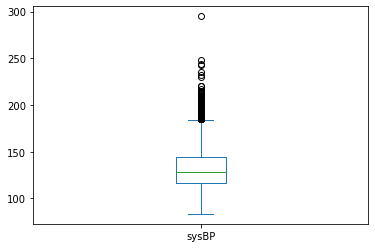

In [186]:
df.sysBP.plot.box()

<AxesSubplot:>

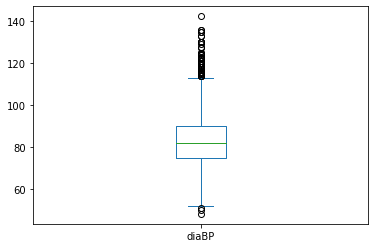

In [187]:
df.diaBP.plot.box()

<AxesSubplot:>

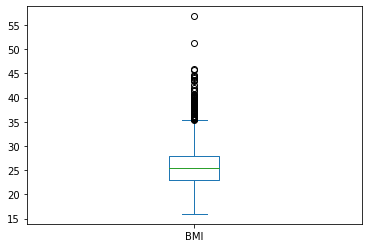

In [188]:
df.BMI.plot.box()

<AxesSubplot:>

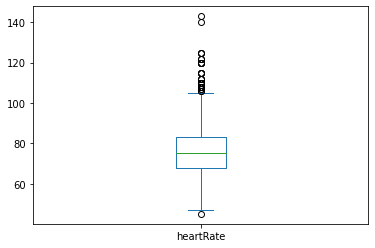

In [189]:
df.heartRate.plot.box()

<AxesSubplot:>

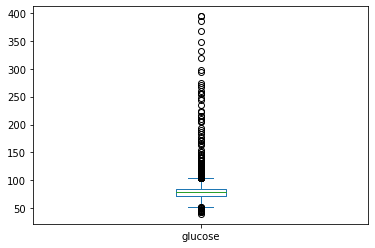

In [190]:
df.glucose.plot.box()

In [191]:
boxcol=['cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

In [192]:
# Applying log transformation to the data to remove outliers
for i in boxcol:
  df[i]=np.log(df[i]+1)

In [193]:
df.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,F,YES,1.386294,0.0,0,0,0,5.402677,5.003946,4.454347,3.288214,4.510860,4.394449,1
1,36,M,NO,0.000000,0.0,0,1,0,5.361292,5.129899,4.595120,3.426540,4.290459,4.330733,0
2,46,F,YES,2.397895,0.0,0,0,0,5.525453,4.762174,4.276666,3.061052,4.488636,4.553877,0
3,50,M,YES,3.044522,0.0,0,1,0,5.455321,5.068904,4.488636,3.376221,4.234107,4.553877,1
4,64,F,YES,3.433987,0.0,0,0,0,5.488938,4.923624,4.454347,3.311273,4.262680,4.356709,0


<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

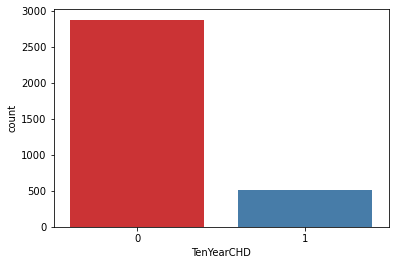

In [194]:
# Count plot 
sns.countplot(x='TenYearCHD',data=df,palette='Set1')


In [195]:
# Label encoding using lamba function
df['sex']=df['sex'].apply (lambda x:0 if x=='F' else 1 )
df['is_smoking']=df['is_smoking'].apply (lambda x:0 if x=='NO' else 1 )

In [196]:

df.columns

Index(['age', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [197]:
# Applying SMOTE to over sample the data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=101)

# fit predictor and target variable
X, y = smote.fit_resample(df[['age', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke','prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI','heartRate', 'glucose']], df['TenYearCHD'])


In [198]:
# Creating a new oversampled dataframe
newdf=pd.DataFrame(X,columns=['age', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke','prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI','heartRate', 'glucose'])
newdf['TenYearCHD']=y

/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

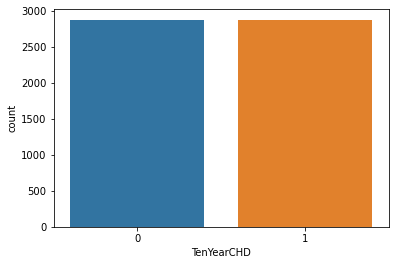

In [199]:
# Count plot ot check the balance of the data
sns.countplot(newdf['TenYearCHD'])

<AxesSubplot:>

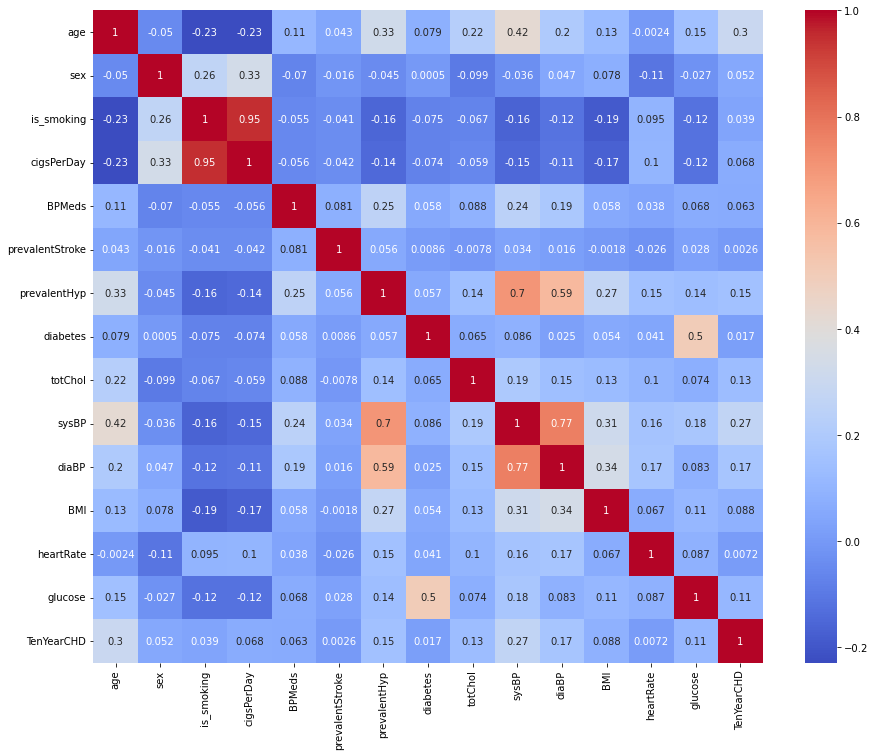

In [200]:
# Heatmap to see the correlation among the variables
plt.figure(figsize=(15,12))
correlation = newdf.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

In [201]:
# Preparing the data to scale down
newdf.pop(item='TenYearCHD')

0       1
1       0
2       0
3       1
4       0
       ..
5753    1
5754    1
5755    1
5756    1
5757    1
Name: TenYearCHD, Length: 5758, dtype: int64

In [202]:
# Applying standard scaler
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()


In [203]:
df=ss.fit_transform(newdf)
df=pd.DataFrame(df,columns=['age','sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke','prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI','heartRate', 'glucose'])

In [204]:
df['TenYearCHD']=y

In [205]:
df.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.476120,-0.888118,0.980053,-0.037342,-0.201823,-0.066036,-0.742419,-0.147128,-0.390803,0.587693,0.132184,0.018580,1.274809,-0.073888,1
1,-1.773013,1.125976,-1.020353,-0.970338,-0.201823,-0.066036,1.346949,-0.147128,-0.625590,1.380177,1.137060,0.997282,-0.291699,-0.384969,0
2,-0.612608,-0.888118,0.980053,0.643479,-0.201823,-0.066036,-0.742419,-0.147128,0.305731,-0.933524,-1.136157,-1.588665,1.116857,0.704488,0
3,-0.148446,1.125976,0.980053,1.078668,-0.201823,-0.066036,1.346949,-0.147128,-0.092143,0.996403,0.376949,0.641261,-0.692231,0.704488,1
4,1.476120,-0.888118,0.980053,1.340783,-0.201823,-0.066036,-0.742419,-0.147128,0.098572,0.082309,0.132184,0.181728,-0.489144,-0.258148,0


In [206]:
# Splitting the data into train and test data
from sklearn.model_selection import train_test_split
x=df.iloc[:,:-1]
y=df.iloc[:,-1:]
x[:1]

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.47612,-0.888118,0.980053,-0.037342,-0.201823,-0.066036,-0.742419,-0.147128,-0.390803,0.587693,0.132184,0.01858,1.274809,-0.073888


In [207]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=5)

# **Logistic Regression Model**

In [208]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, max_iter=1000)
clf.fit(x_train, y_train)

/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [209]:
predict=clf.predict(x_test)
predict1=clf.predict(x_train)

In [210]:
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,classification_report,f1_score


In [211]:
# Evaluating logistic regression model using the metrics
test_accuracy = accuracy_score(y_test,predict)
cm = confusion_matrix(y_test,predict)
print("The accuracy of test data is", test_accuracy*100,'%')
print("The precision of test data is", precision_score(y_test,predict)*100 ,'%')
print("The recall of test data is", recall_score(y_test,predict)*100,'%')



The accuracy of test data is 65.06944444444444 %
The precision of test data is 66.19318181818183 %
The recall of test data is 63.748290013679885 %


In [212]:
print('The Confusion Matrix for test data is: \n',confusion_matrix(y_test,predict))

The Confusion Matrix for test data is: 
 [[471 238]
 [265 466]]


In [213]:
# Hyper parameter tuning
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [214]:

solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=clf, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)


In [215]:
grid_result = grid_search.fit(x_train, y_train)
print("Best accuracy score: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d arr

/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d arr

/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d arr

/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d arr

/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d arr

/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d arr

/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d arr

/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d arr

/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d arr

Best accuracy score: 0.658789 using {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [216]:
grid_result.best_estimator_

LogisticRegression(C=0.1, max_iter=1000, solver='newton-cg')

In [217]:
optimal_logistic_model=grid_result.best_estimator_

In [218]:
op_train_pred=optimal_logistic_model.predict(x_train)
op_test_pred=optimal_logistic_model.predict(x_test)

In [219]:
print('Accuracy score of train data is',accuracy_score(op_train_pred,y_train))
print('Accuracy score of test data is',accuracy_score(op_test_pred,y_test))


Accuracy score of train data is 0.6623436776285317
Accuracy score of test data is 0.6486111111111111


# **K Nearest Neighbor Model**

In [220]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,20)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(x_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(x_test, y_test) 

/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1

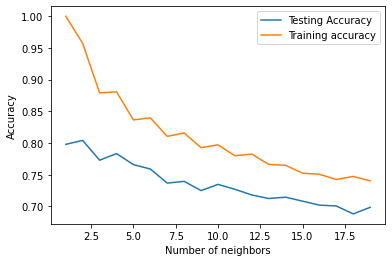

In [221]:
# Generate plot of test accuracy and train accuracy to determine k value

plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [222]:
knn = KNeighborsClassifier(n_neighbors=9)

In [223]:
# Fitting the model

knn.fit(x_train,y_train)

/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=9)

In [224]:
# Predicting the values of y_test 
y_pred = knn.predict(x_test)

In [225]:
# Evaluating KNN model using the metrics
print('The accuracy score of knn model is ',knn.score(x_test,y_test)*100,'%')
print('The precision score of knn model is ',precision_score(y_test,y_pred)*100,'%')
print('The recall score of knn model is ',recall_score(y_test,y_pred)*100,'%')

The accuracy score of knn model is  72.5 %
The precision score of knn model is  67.9144385026738 %
The recall score of knn model is  86.8673050615595 %


In [226]:
confusion_matrix(y_test,y_pred)

array([[409, 300],
       [ 96, 635]])

In [227]:
param_grid = {'n_neighbors':np.arange(13,20)}

In [228]:
# Hyper parameter tuning
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(x_train,y_train)

/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1

/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([13, 14, 15, 16, 17, 18, 19])})

In [229]:
# Best possible score
knn_cv.best_score_

0.706808184198103

In [230]:
knn_optimal=knn_cv.best_estimator_
kop_train_pred=knn_cv.predict(x_train)
kop_test_pred=knn_cv.predict(x_test)

In [231]:
print('Accuracy score of KNN train data is',round(accuracy_score(kop_train_pred,y_train)*100,2))
print('Accuracy score of KNN test data is',round(accuracy_score(kop_test_pred,y_test)*100,2))


Accuracy score of KNN train data is 76.49
Accuracy score of KNN test data is 71.46


# **Random Forest Classifier Model**

In [232]:
from sklearn.ensemble import RandomForestClassifier

In [233]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 10, stratify = y)

In [234]:
X_train

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
89,61,1,0,0.000000,0.0,0,1,0,5.497168,4.962845,4.499810,3.342862,4.189655,4.219508
3753,60,1,1,2.573425,0.0,0,0,0,5.449921,4.907885,4.333334,3.148662,4.333334,4.123933
1697,45,1,1,3.044522,0.0,0,0,0,5.488938,4.867534,4.394449,3.336125,4.189655,4.189655
2810,64,0,0,0.000000,0.0,0,1,0,5.545177,5.036953,4.330733,3.194173,4.110874,4.317488
5654,52,0,0,0.000000,0.0,0,0,0,5.490197,4.888468,4.373788,3.238960,4.020409,4.332505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,40,0,1,2.397895,0.0,0,0,0,5.351858,4.644391,4.276666,3.234749,4.304065,4.234107
1928,46,0,0,0.000000,0.0,0,0,0,5.361292,4.779123,4.382027,3.326115,4.262680,4.290459
2932,54,1,0,0.000000,0.0,0,0,0,5.192957,4.644391,4.304065,3.092405,4.110874,4.442651
4607,37,0,1,2.551286,0.0,0,0,0,5.589835,4.734108,4.252299,3.109885,4.163028,4.381156


In [235]:
classifier = RandomForestClassifier(random_state=10,n_estimators=50)
grid_values = {'max_depth':[6, 7, 8],'min_samples_split' : [50,70,100]}
classifier = GridSearchCV(classifier, param_grid = grid_values,scoring='accuracy', cv=5)

In [236]:
# Fitting the model
classifier.fit(X_train,Y_train)

/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_va

/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/amoghpai/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_va

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=50, random_state=10),
             param_grid={'max_depth': [6, 7, 8],
                         'min_samples_split': [50, 70, 100]},
             scoring='accuracy')

In [237]:
# Evaluating the model using metrics
pred=classifier.predict(X_test)

print('The accuracy of the Random Forest model is',round((accuracy_score(Y_test,pred)*100),2) ,'%')
print('The precision of the Random Forest model is',round((precision_score(Y_test,pred)*100),2) ,'%')
print('The recall of the Random Forest model is',round((recall_score(Y_test,pred)*100),2) ,'%')

The accuracy of the Random Forest model is 74.65 %
The precision of the Random Forest model is 71.39 %
The recall of the Random Forest model is 82.29 %


In [238]:
print('The Confusion matrix of Random forest model is \n',confusion_matrix(Y_test,pred))

The Confusion matrix of Random forest model is 
 [[386 190]
 [102 474]]


In [239]:
classifier.best_params_,classifier.best_score_

({'max_depth': 8, 'min_samples_split': 50}, 0.732740513588691)

In [240]:
rf_optimal_model=classifier.best_estimator_
classifier.best_estimator_

RandomForestClassifier(max_depth=8, min_samples_split=50, n_estimators=50,
                       random_state=10)

In [241]:
rfop_train_pred=rf_optimal_model.predict(X_train)
rfop_test_pred=rf_optimal_model.predict(X_test)

In [242]:
print('Accuracy score of random forest train data is',round(accuracy_score(rfop_train_pred,Y_train)*100,2))
print('Accuracy score of random forest test data is',round(accuracy_score(rfop_test_pred,Y_test)*100,2))

Accuracy score of random forest train data is 79.24
Accuracy score of random forest test data is 74.65


# **Summary**

# 1. Handled majority of the null values by replacing them with mean values and dropped a row which had null value in heartrate column.

# 2.Treated the outliers using log transformation.

# 3.Handled the imbalanced class by applying SMOTE.

# 4.Standard Scaler was used to scale down the data.

# 5.Applied 3 machine learning models on the dataset i.e,

###- Logistic Regression.
###- K Nearest Neighbor.
###- Random Forest Classifier.

# 6.Hyperparameter tuning was performed on all the models to get best parameters and best scores.



